In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer 
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r'data/preprocess_IndianWeatherRepository.csv')
df.head(5)

temperature_celsius  wind_mph  wind_kph  wind_degree  pressure_mb   
0                 27.5      12.8      20.5          281       1008.0  \
1                 27.5       9.6      15.5          287       1008.0   
2                 26.3      11.4      18.4          317       1009.0   
3                 25.6      10.5      16.9          297       1009.0   
4                 27.2      10.1      16.2          274       1009.0   

   pressure_in  precip_mm  precip_in  humidity  cloud  ...   
0        29.77        0.0        0.0        67     26  ...  \
1        29.78        0.0        0.0        70     19  ...   
2        29.78        0.0        0.0        70     51  ...   
3        29.80        0.0        0.0        76     65  ...   
4        29.79        0.0        0.0        74     82  ...   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide   
0                           1.7                          3.1  \
1                           2.1                          2.6   
2                           0.6                          1.7   
3                           1.2                          1.1   
4                           2.2                          1.8   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index   
0               12.6              18.5                         1  \
1               10.7              14.2                         1   
2               16.8              20.7                         2   
3                4.9               6.6                         1   
4               11.4              14.8                         1   

   air_quality_gb-defra-index  sunrise  sunset      moon_phase   
0                           2    21540   67260  Waxing Gibbous  \
1                           1    21600   67200  Waxing Gibbous   
2                           2    21360   66840  Waxing Gibbous   
3                           1    21600   67080  Waxing Gibbous   
4                           1    21660   67140  Waxing Gibbous   

   moon_illumination  
0                 93  
1                 93  
2                 93  
3                 93  
4                 93  

[5 rows x 26 columns]

In [3]:
df.columns

Index(['temperature_celsius', 'wind_mph', 'wind_kph', 'wind_degree',
       'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moon_phase',
       'moon_illumination'],
      dtype='object')

In [4]:
translate_columns = ["температура по Цельсию", "ветер миль/час", "ветер км/ч", "градус ветра",
                    "давление (милибары)", "давление (дюймы)", "осадки мм", "осадки (дюймы)", "влажность",
                    "облачность", "ощущения по Цельсию", "видимость км", "уф индекс", "скорость ветра км/ч",
                    "качество воздуха Окись углерода", "качество воздуха озон",
                    "качество воздуха диоксид азота", "качество воздуха диоксид серы",
                    "качество воздуха PM2.5", "качество воздуха PM10", "индекс качества воздуха usepa-index",
                    "качество воздуха gb defra-index", "восход солнца", "заход солнца", "фаза луны",
                    "лунное освещение"]

In [5]:
weather_features = ['temperature_celsius',
                   'wind_kph',
                   'wind_degree',
                   'pressure_mb',
                   'uv_index']

air_features = ['air_quality_Carbon_Monoxide', 
                'air_quality_Ozone',
                'air_quality_Nitrogen_dioxide', 
                'air_quality_Sulphur_dioxide',
                'air_quality_PM2.5', 'air_quality_PM10',
                'air_quality_us-epa-index', 
                'air_quality_gb-defra-index']
target_features = ['visibility_km']
all_features = weather_features + air_features

In [6]:
scaler_df = df.copy()
st_scaler = StandardScaler()
for col in all_features + target_features:
    scaler_df[col] = st_scaler.fit_transform(df[col].values.reshape((-1, 1)))

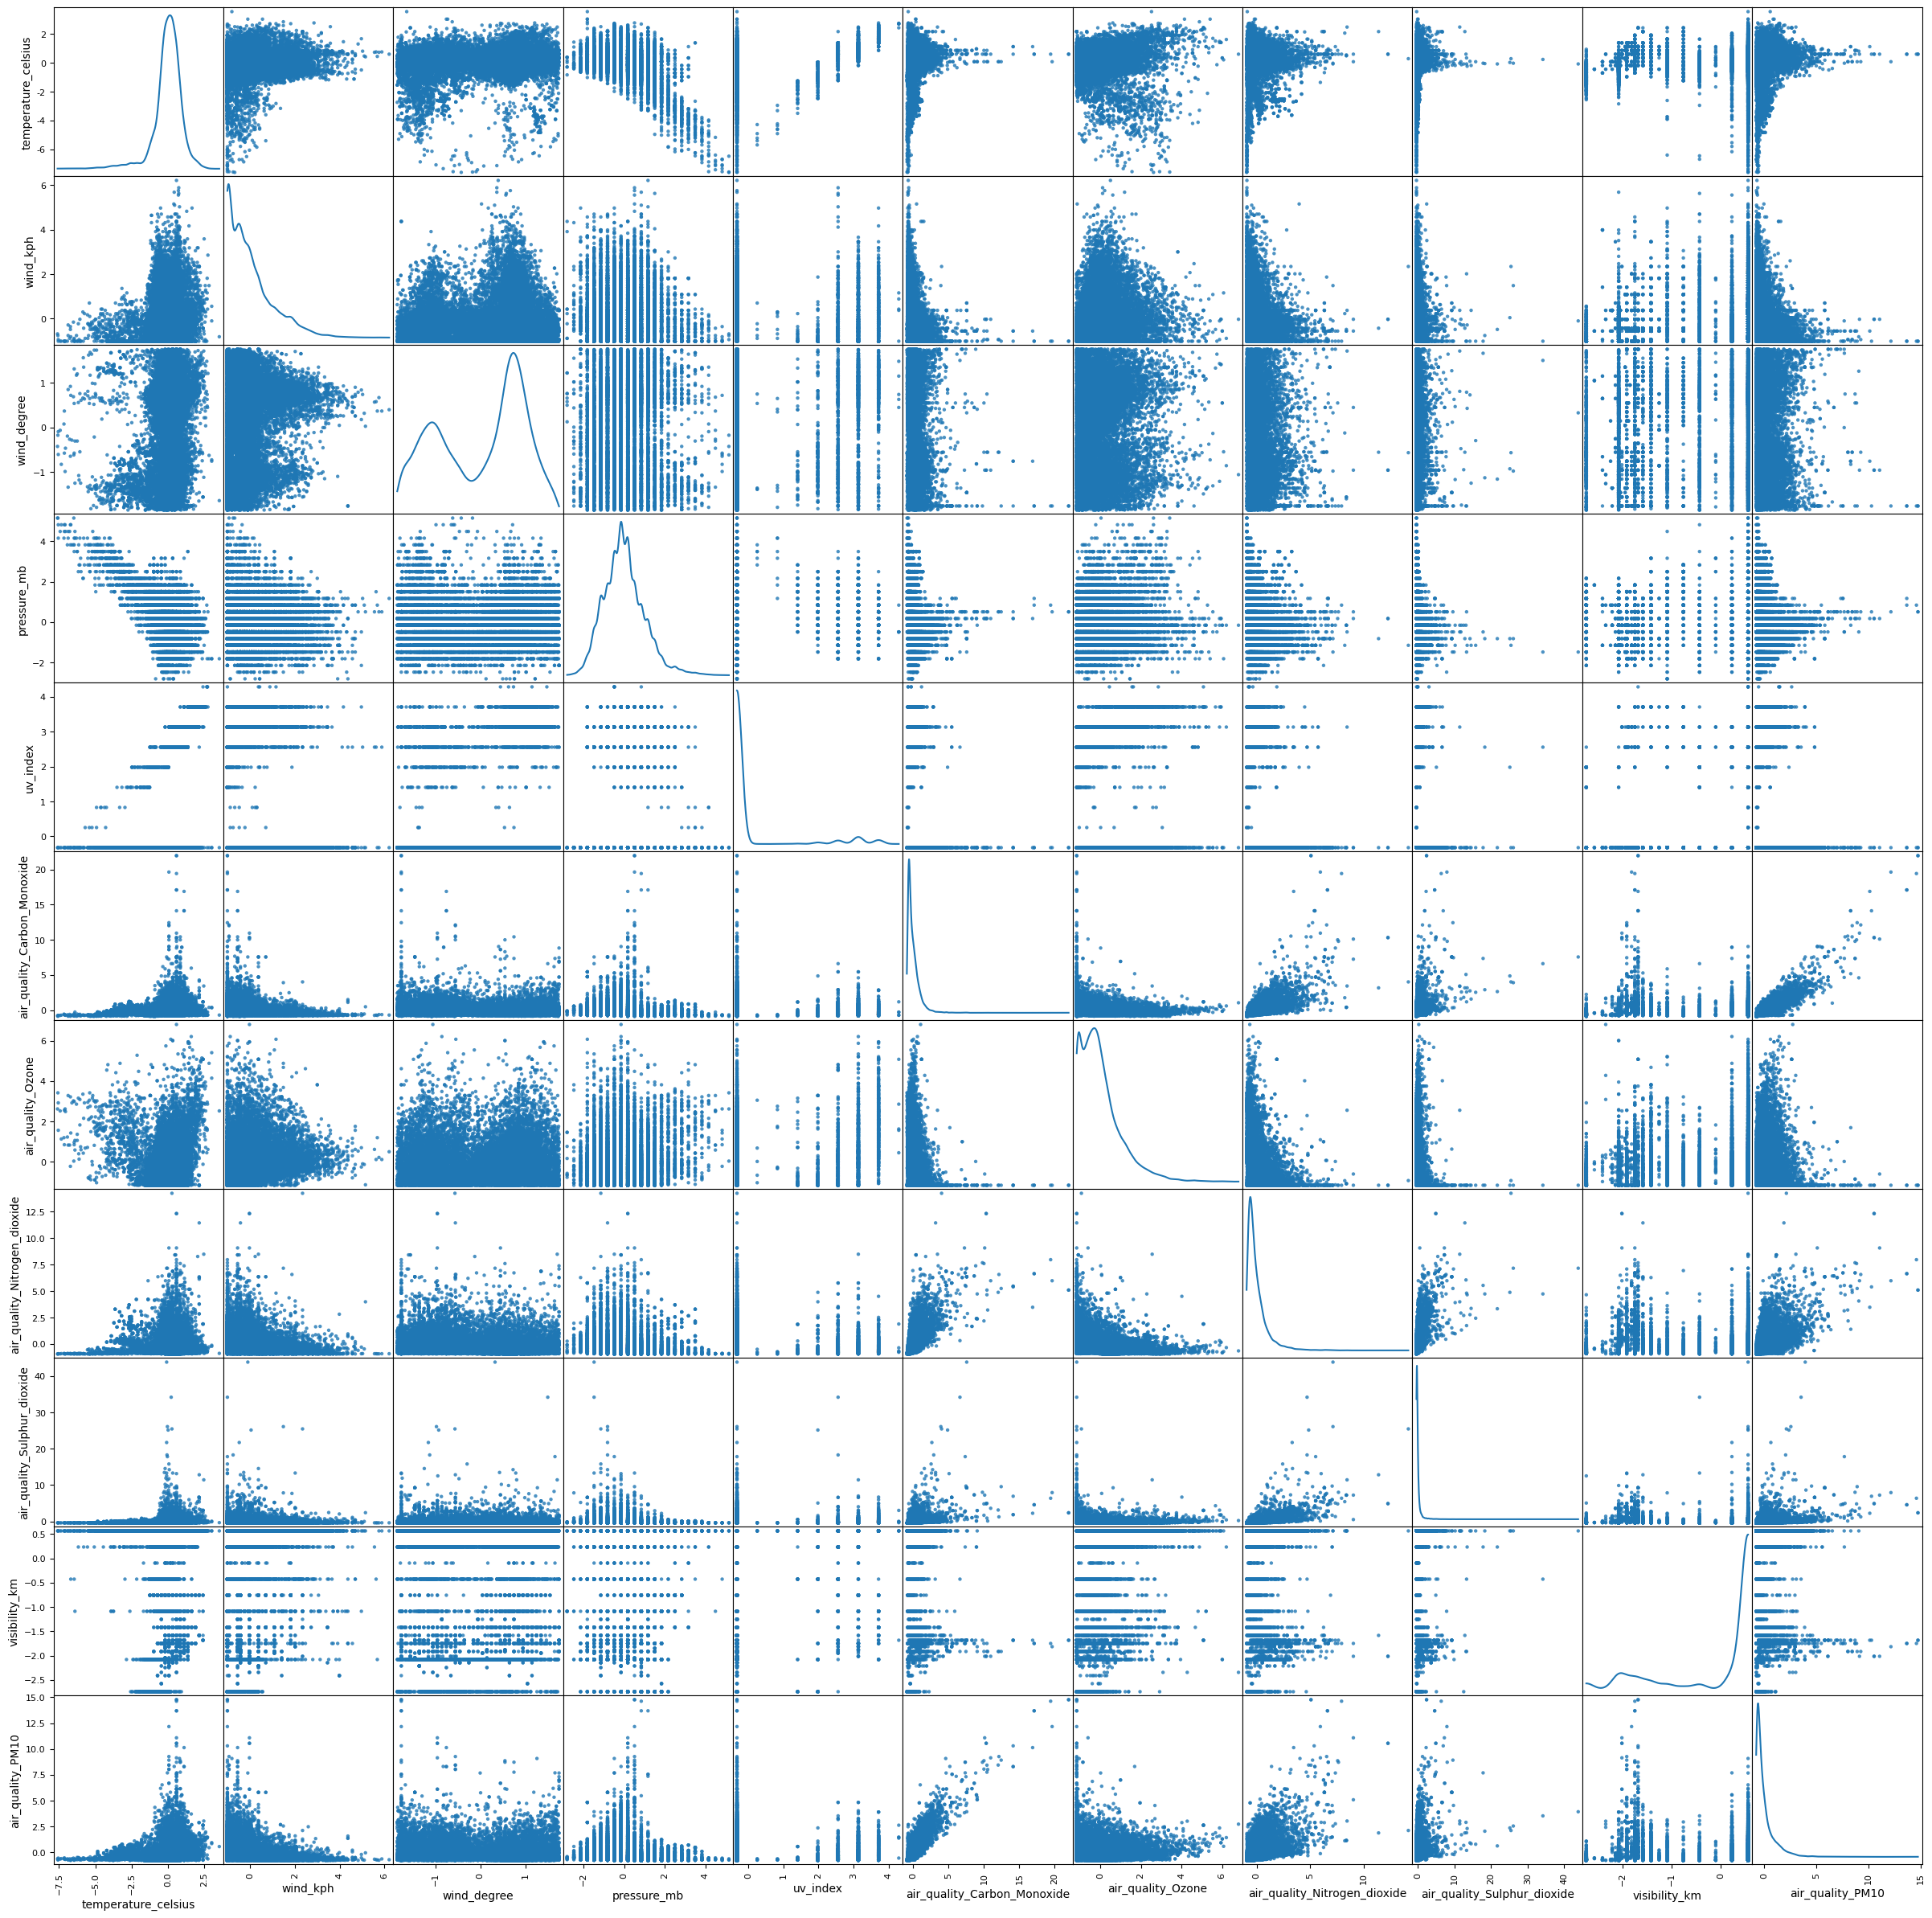

In [40]:
pd.plotting.scatter_matrix(scaler_df[all_features + target_features], figsize=(30, 30), marker='o',
                           hist_kwds={'bins': 20}, s=10, alpha=.8, diagonal='kde')
None

In [8]:
df['visibility_km'].describe()

count    18055.000000
mean         8.296466
std          3.025965
min          0.000000
25%          9.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: visibility_km, dtype: float64

In [9]:
df['visibility_km'].value_counts()

visibility_km
10.0    12535
9.0      1139
2.0      1024
3.0       550
4.0       516
0.0       479
7.0       396
5.0       386
2.5       232
6.0       207
3.5       185
3.2       165
2.8        46
2.2        32
4.5        26
8.0        25
2.1        20
2.6        17
2.4        17
1.8        16
1.6        14
1.0        11
1.2         5
1.5         4
2.7         4
0.5         4
Name: count, dtype: int64

In [10]:
len(all_features + target_features)

14

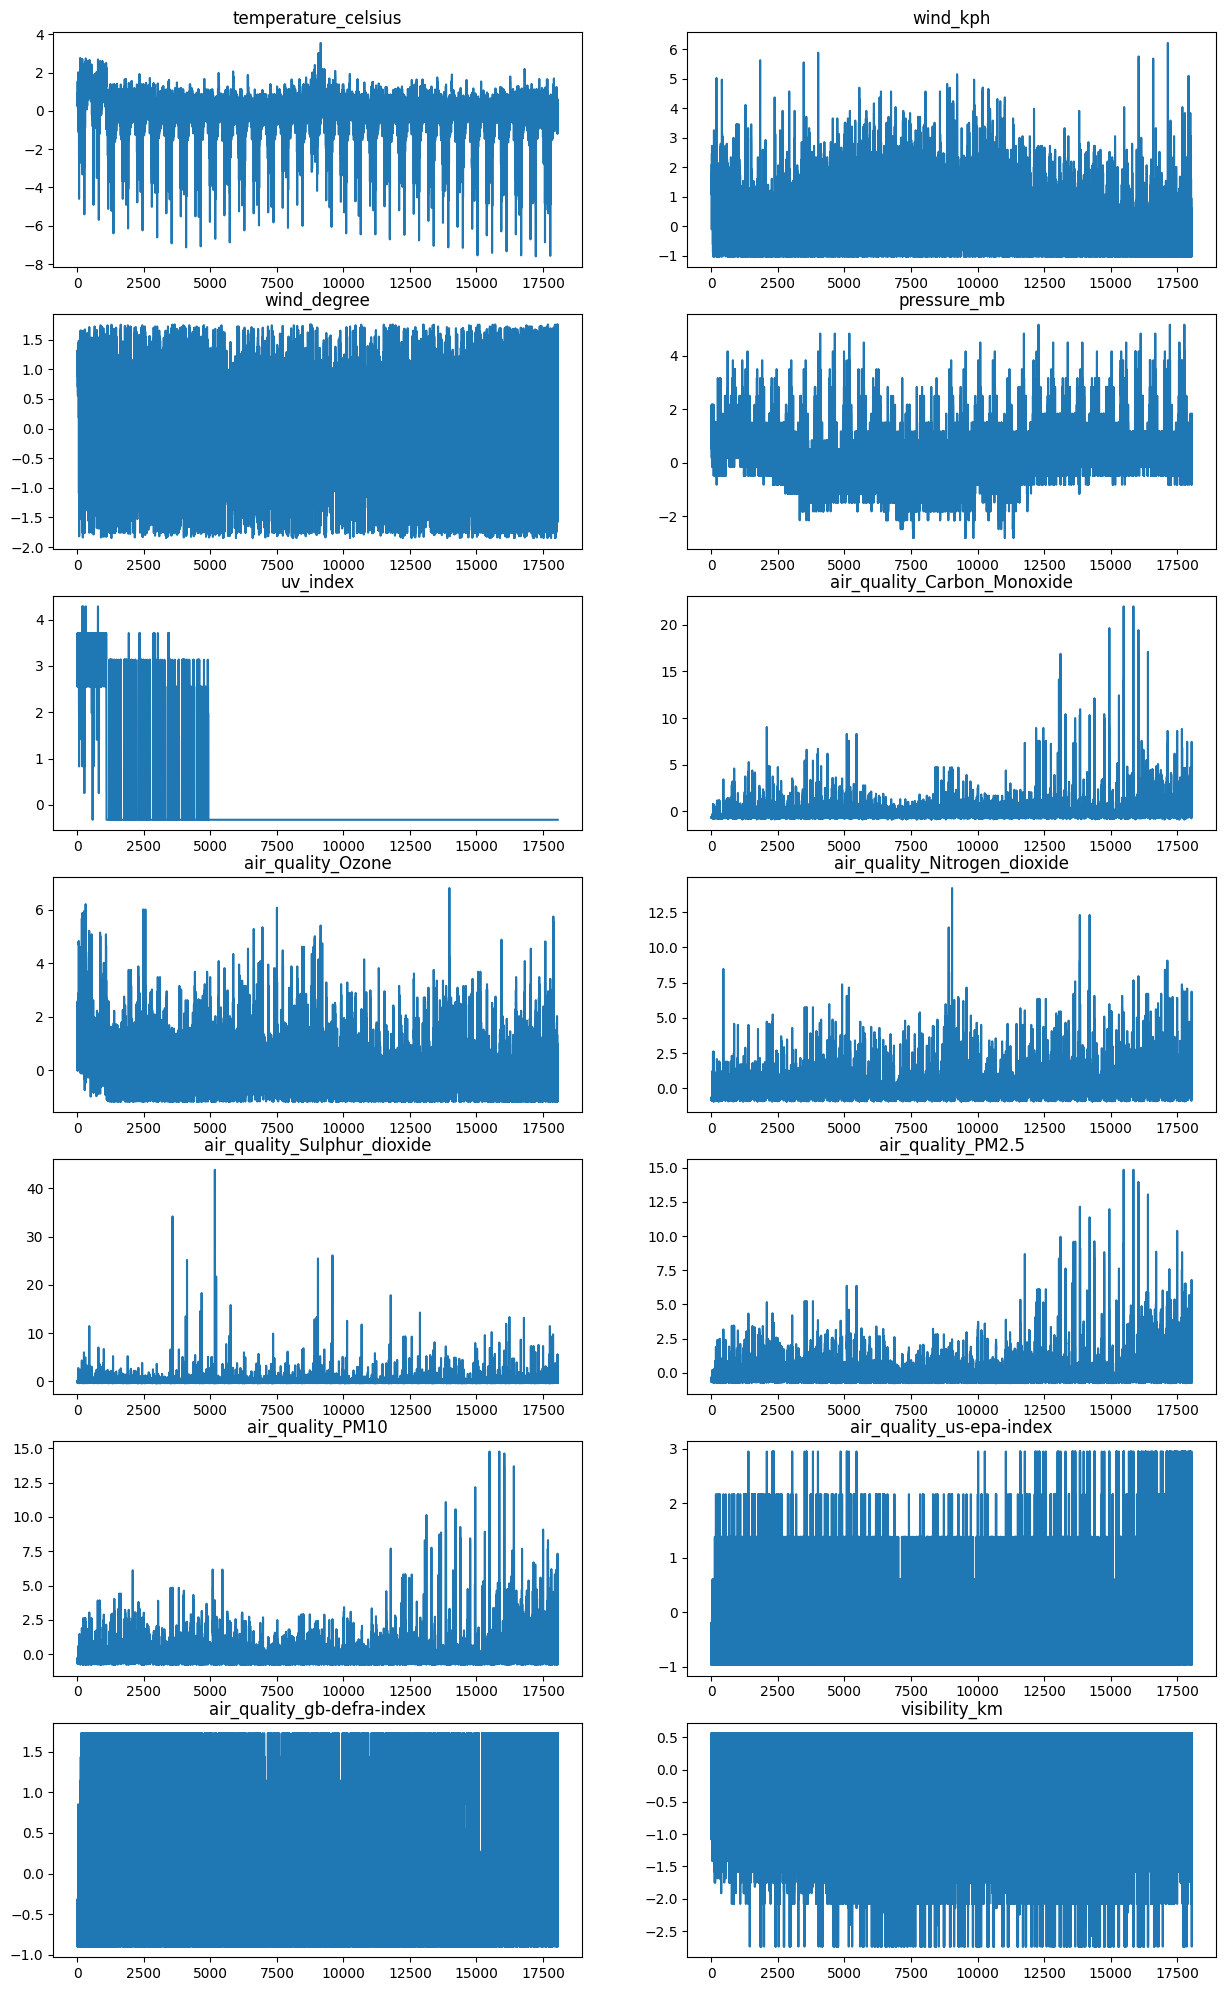

In [11]:
fig, ax_arr = plt.subplots(nrows=7, ncols=2, figsize=(15, 25))
for col, ax in zip(all_features + target_features, ax_arr.ravel()):
    ax.plot(scaler_df.index, scaler_df[col])
    ax.set_title(col)
plt.show()

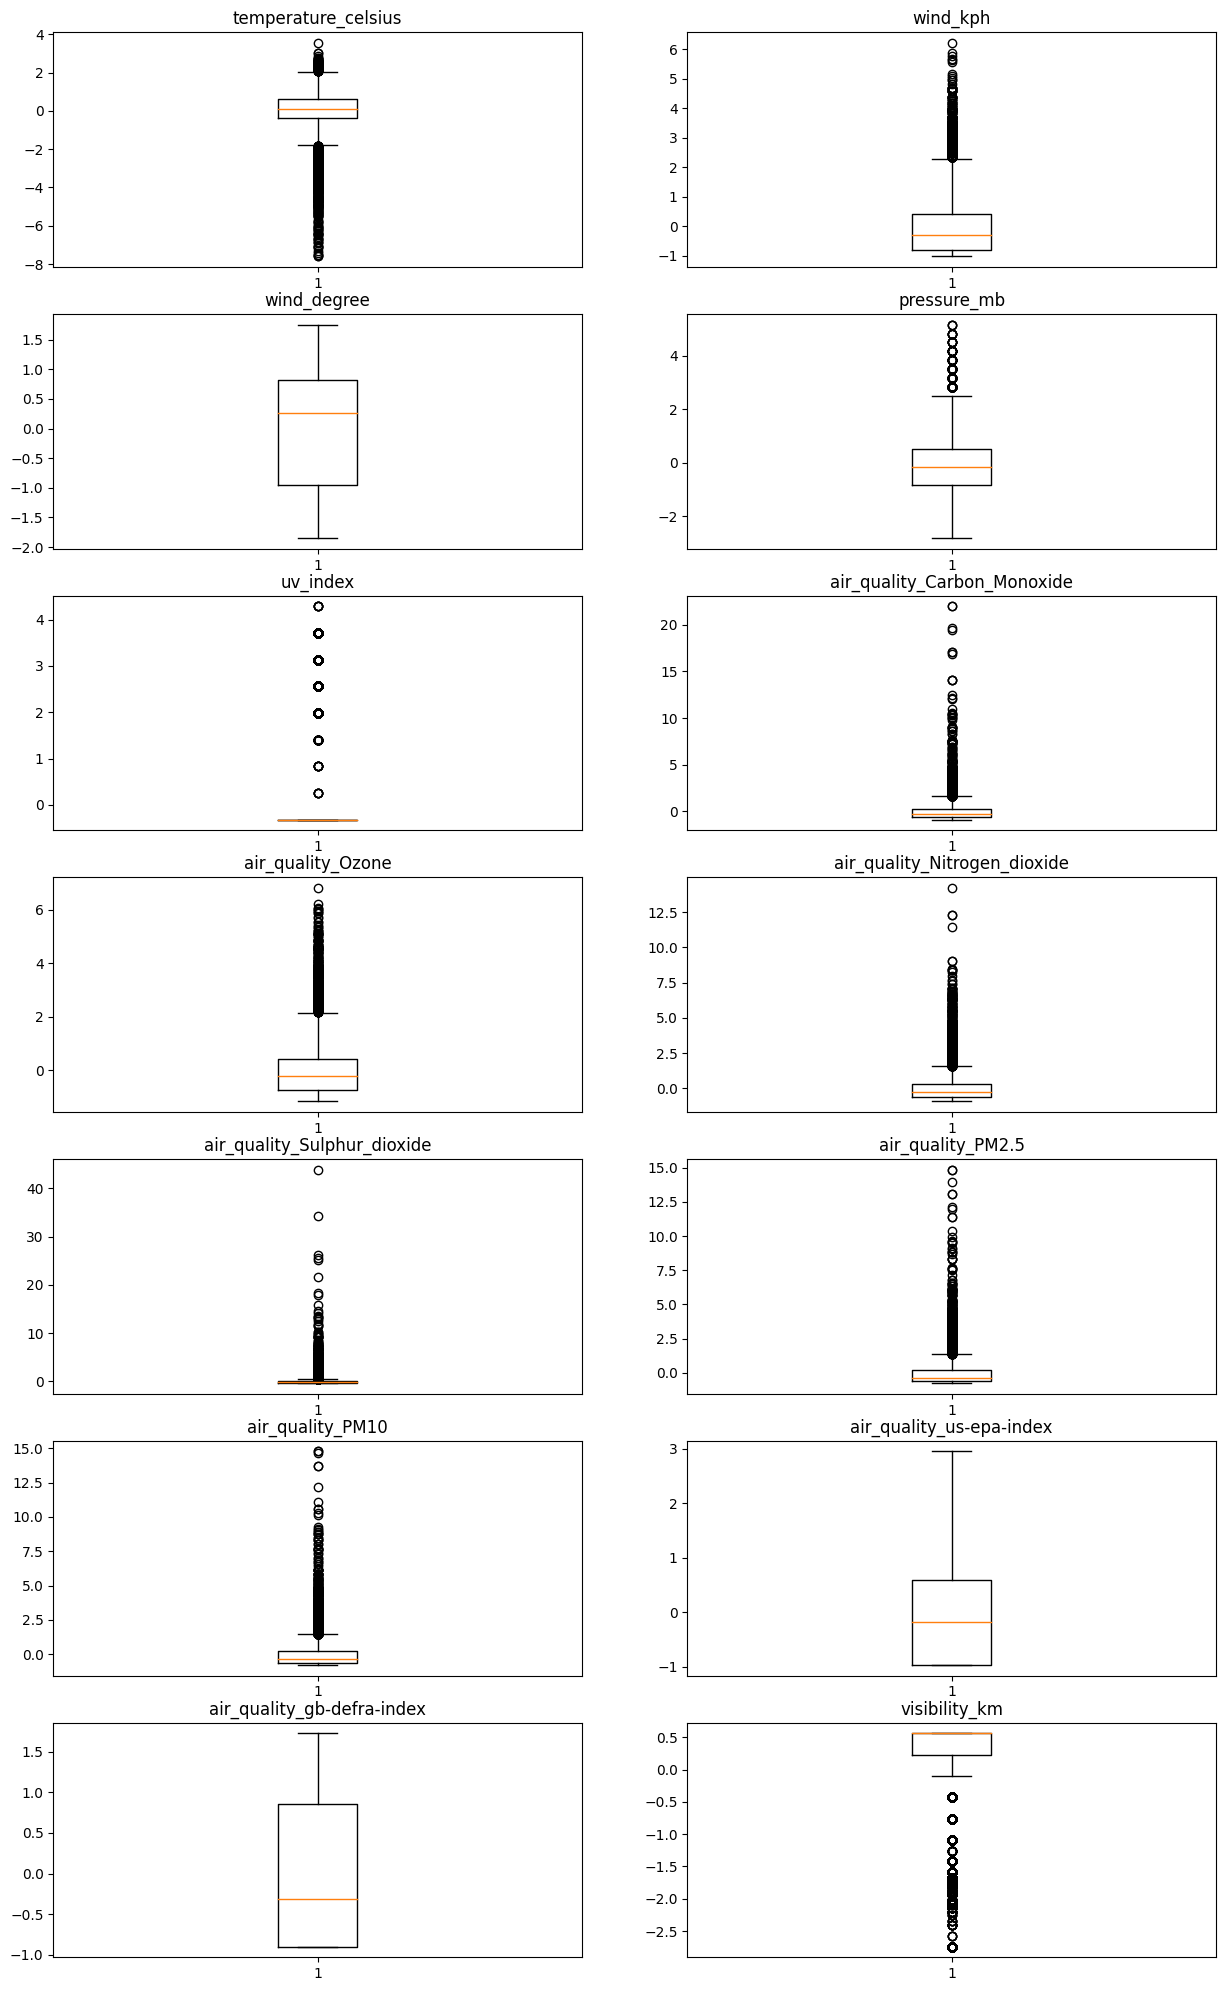

In [12]:
fig, ax_arr = plt.subplots(nrows=7, ncols=2, figsize=(15, 25))
for col, ax in zip(all_features + target_features, ax_arr.ravel()):
    ax.boxplot(scaler_df[col])
    ax.set_title(col)
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
air_features

['air_quality_Carbon_Monoxide',
 'air_quality_Ozone',
 'air_quality_Nitrogen_dioxide',
 'air_quality_Sulphur_dioxide',
 'air_quality_PM2.5',
 'air_quality_PM10',
 'air_quality_us-epa-index',
 'air_quality_gb-defra-index']

In [15]:
air_features.remove('air_quality_PM2.5')
air_features.remove('air_quality_PM10')
air_features.remove('air_quality_us-epa-index')
air_features.remove('air_quality_gb-defra-index')
all_features = weather_features + air_features + target_features

In [37]:
len(all_features)

10

In [43]:
all_features

['temperature_celsius',
 'wind_kph',
 'wind_degree',
 'pressure_mb',
 'uv_index',
 'air_quality_Carbon_Monoxide',
 'air_quality_Ozone',
 'air_quality_Nitrogen_dioxide',
 'air_quality_Sulphur_dioxide',
 'visibility_km']

In [16]:
target_features = ['air_quality_PM10']

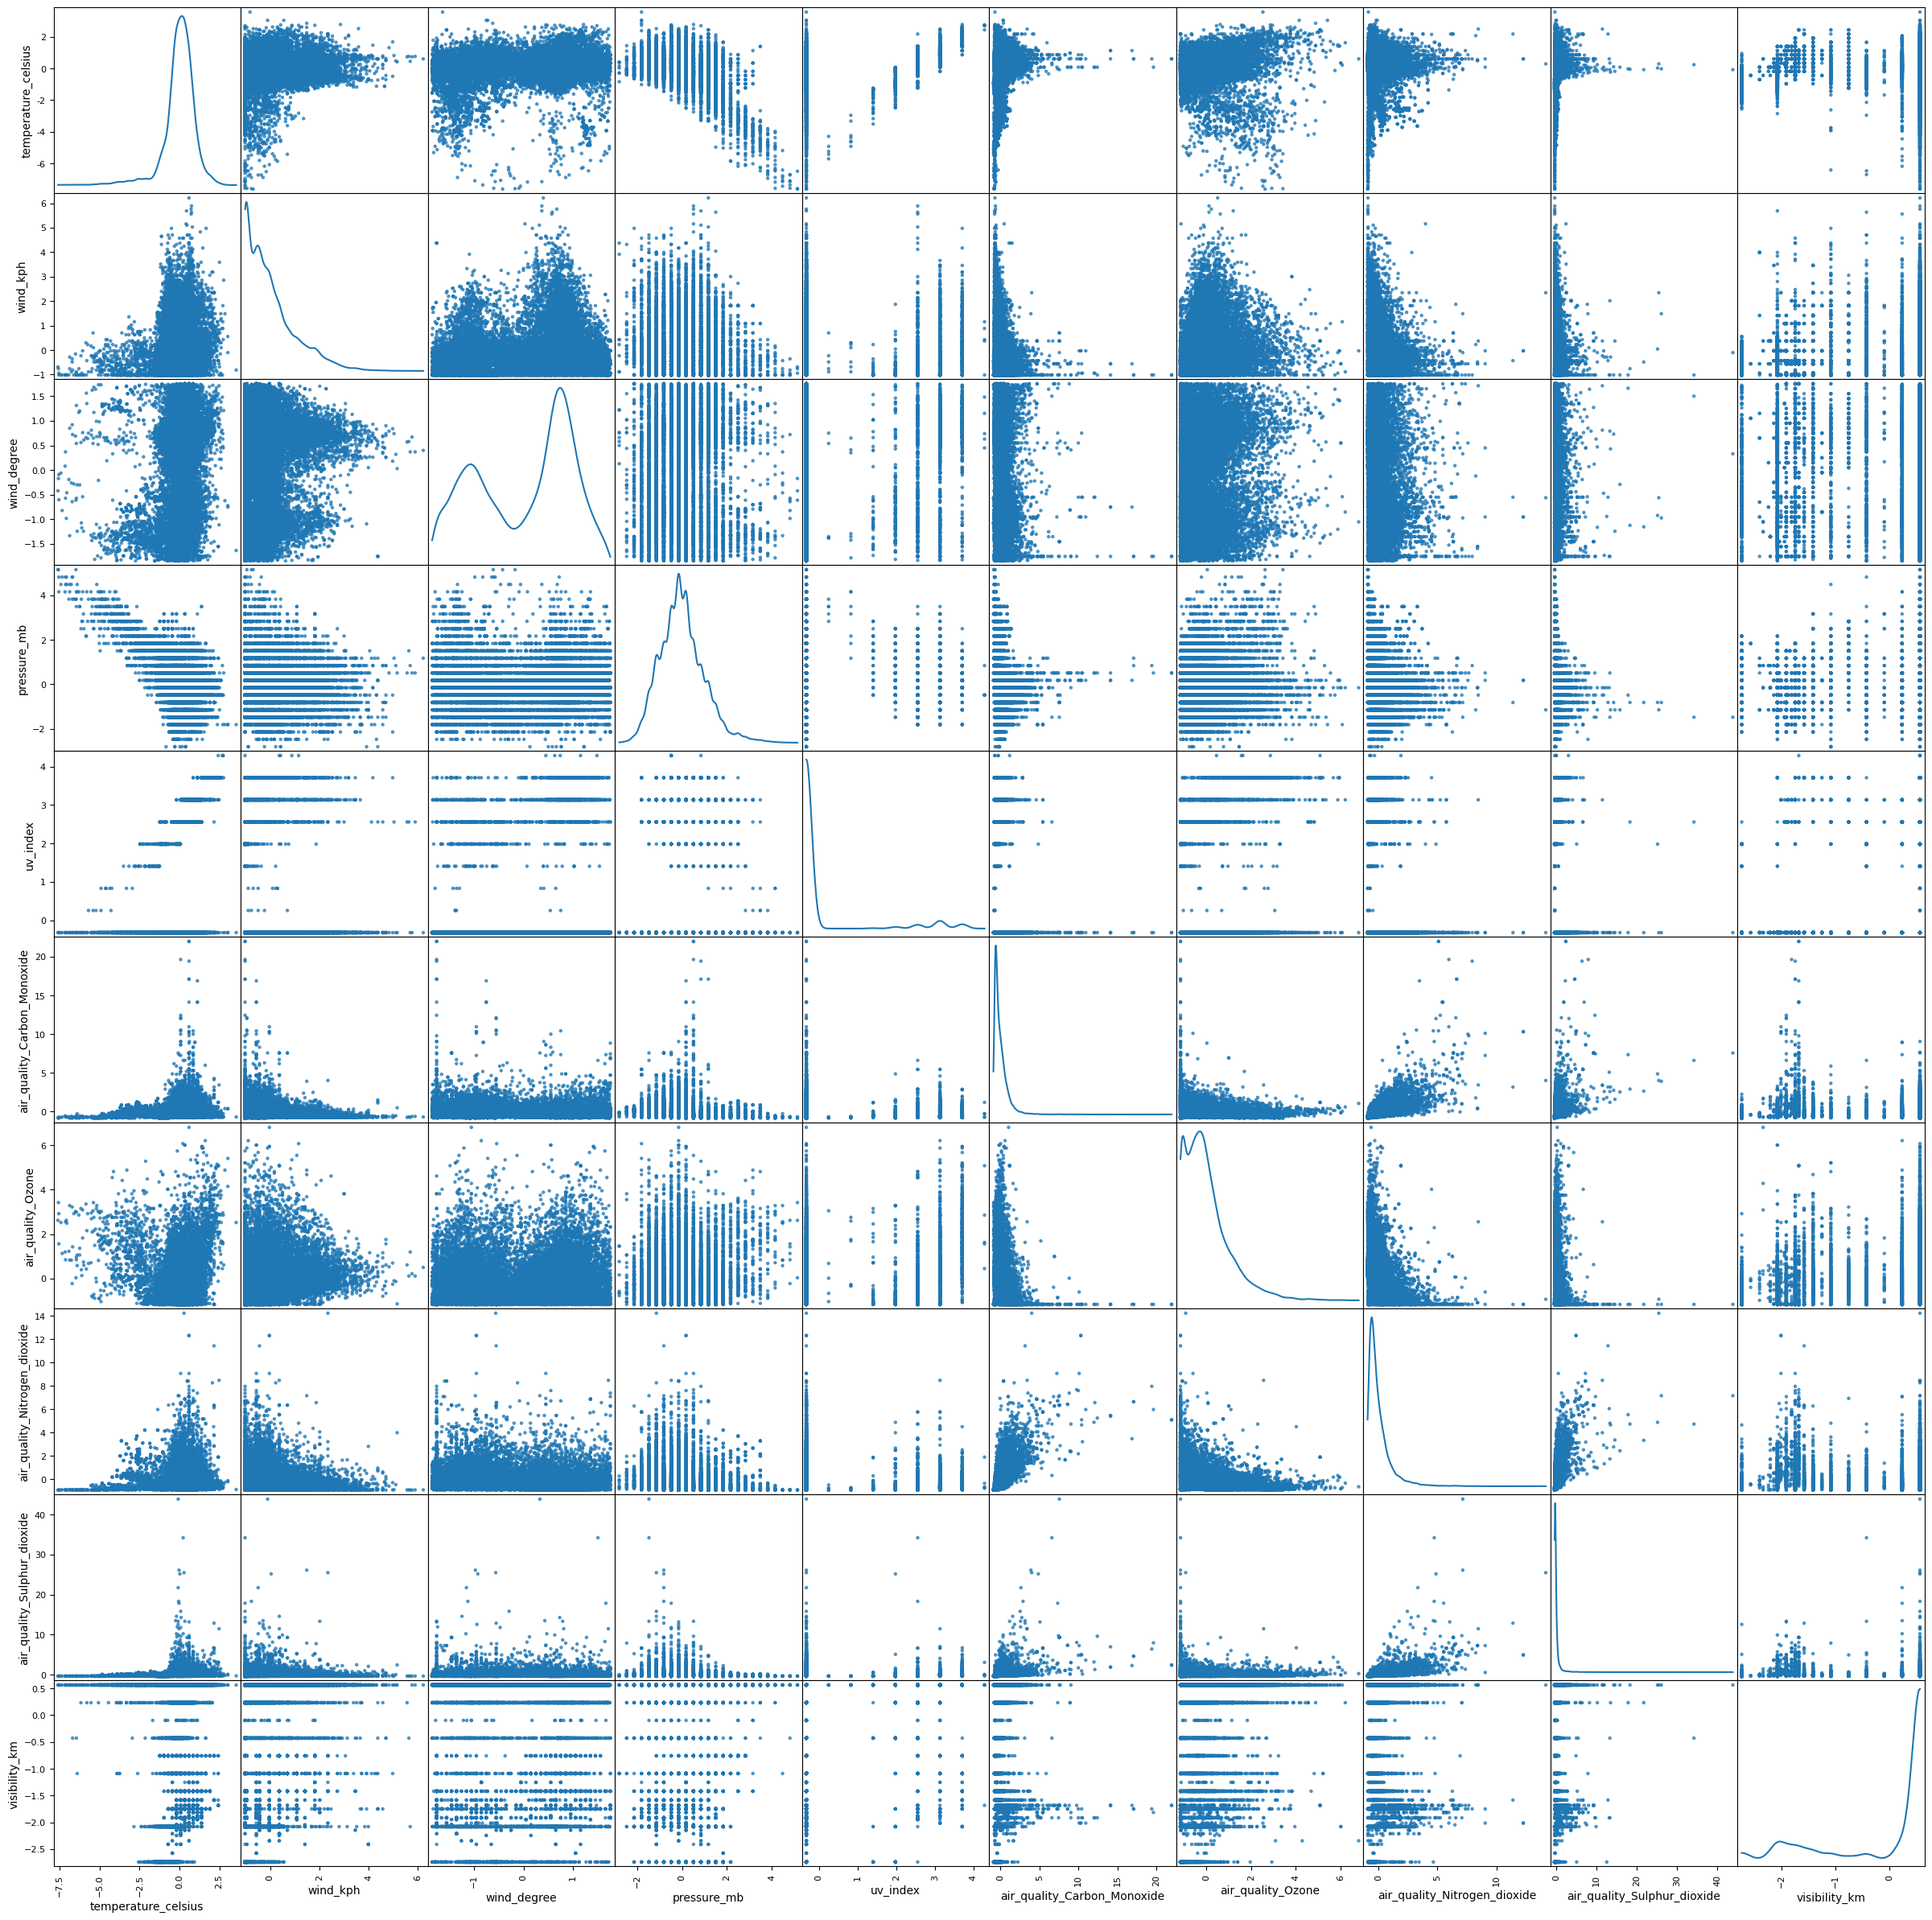

In [39]:
pd.plotting.scatter_matrix(scaler_df[all_features],figsize=(30, 30), marker='o',
                           hist_kwds={'bins': 20}, s=10, alpha=.8, diagonal='kde')
None

In [17]:
X = scaler_df[all_features].values
y = df[target_features].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
linear_mse = mean_squared_error(y_test, lin_reg.predict(X_test))
linear_r2 = r2_score(y_test, lin_reg.predict(X_test))

In [44]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [20]:
print(linear_mse)

1005.9479749889526


In [21]:
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv.fit(X_train, y_train)
print(ridge_cv.alpha_)
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, y_train)


10.0


Ridge(alpha=10.0)

In [22]:
ridge_mse = mean_squared_error(y_test, ridge.predict(X_test))
ridge_r2 = r2_score(y_test, ridge.predict(X_test))

In [23]:
print(ridge_mse)

1005.7219151442769


In [25]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=0),
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}],
             refit=False)

In [31]:
clf.best_params_

{'alpha': 0.31622776601683794}

In [33]:
lasso = Lasso(random_state=0, max_iter=10000, alpha=0.31622776601683794)
lasso.fit(X_train, y_train)
lasso_mse = mean_squared_error(y_test, lasso.predict(X_test))
lasso_r2 = r2_score(y_test, lasso.predict(X_test))

In [42]:
print("---LINEAR REGRESSION---")
print(f"MSE: {linear_mse}")
print(f"R2: {linear_r2}")
print()
print("---RIDGE---")
print(f"MSE: {ridge_mse}")
print(f"R2: {ridge_r2}")
print()
print("---LASSO---")
print(f"MSE: {lasso_mse}")
print(f"R2: {lasso_r2}")

---LINEAR REGRESSION---
MSE: 1005.9479749889526
R2: 0.7810129611024038

---RIDGE---
MSE: 1005.7219151442769
R2: 0.7810621725698256

---LASSO---
MSE: 1010.9771392934334
R2: 0.7799181512051228


In [35]:
results = {
    'Original': y_test,
    'Linear regression': lin_reg.predict(X_test),
    'Ridge': ridge.predict(X_test),
    'LASSO': lasso.predict(X_test)
}

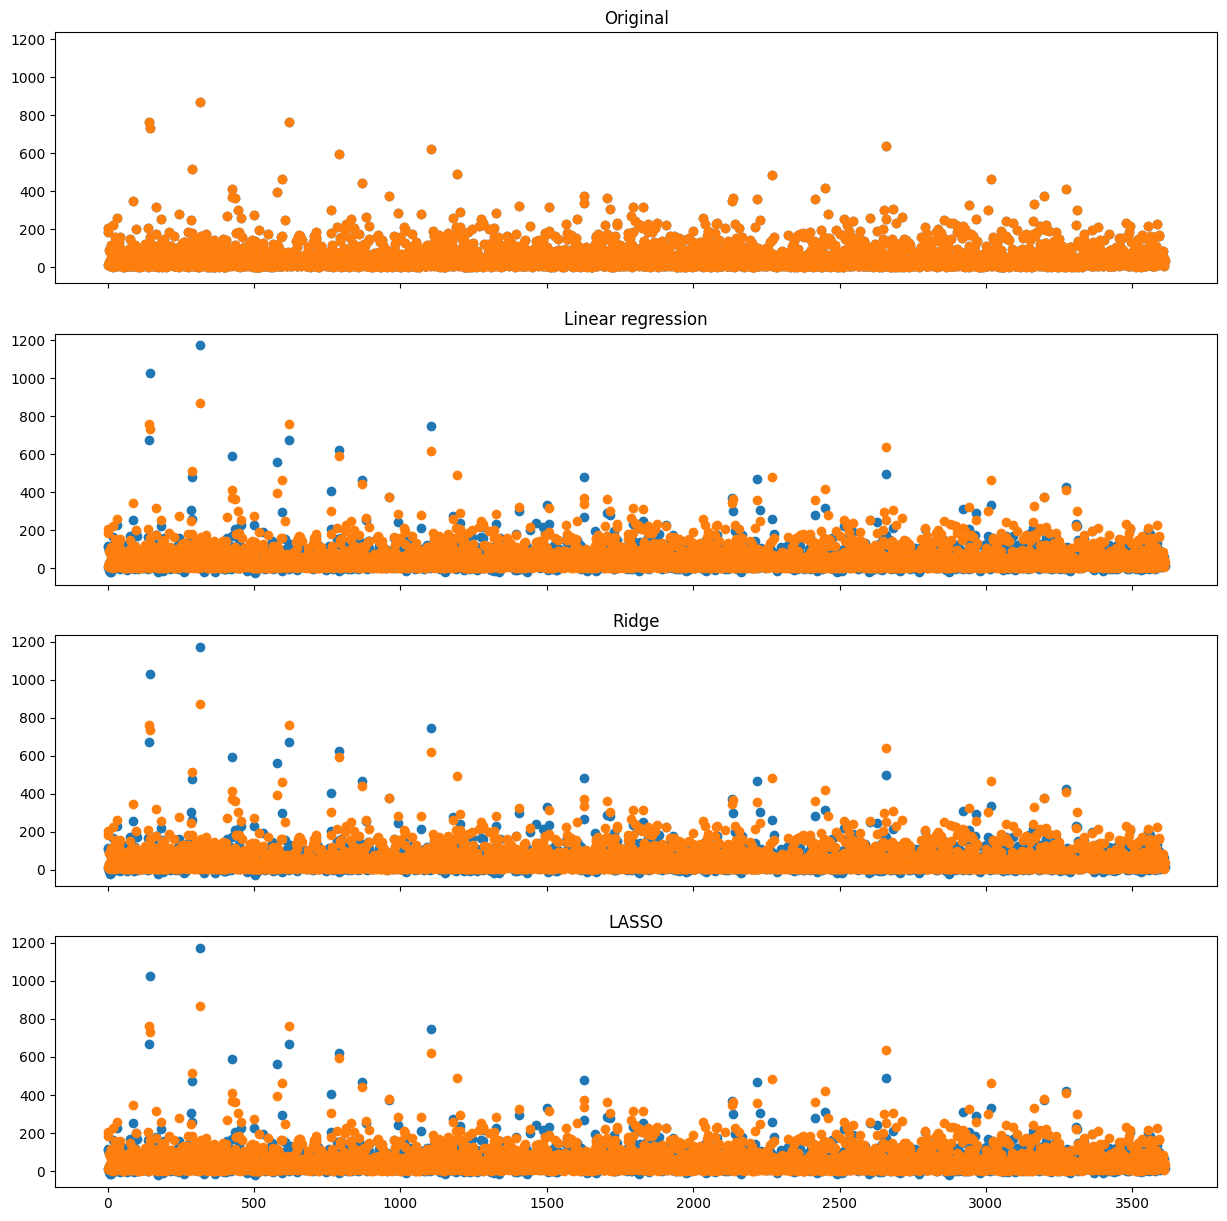

In [36]:
fig, ax_arr = plt.subplots(nrows=4, sharex=True, sharey=True, figsize=(15, 15))
x = [step for step in range(y_test.shape[0])]
for model_name, ax in zip(results.keys(), ax_arr.ravel()):
    ax.scatter(x, results[model_name])
    ax.set_title(model_name)
    if model_name == 'original':
        continue
    ax.scatter(x, y_test)